<a href="https://colab.research.google.com/github/MarcoMarinucci/MLPNS/blob/main/Higgsboson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
from sklearn import preprocessing
import pylab as plt
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize
import json
import os

plt.rcParams['font.size'] = 18


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls

'accettazione_candidatura_ccl_liste (2).gdoc'
'Allegato Unico Iniziative 2017.18_Word.docx'
'APPUNTI ALDO TRENTO A TRIVOLZIO 10-11-2012.doc'
 BaoBisp.pdf
'Career Lab_LIDL.pdf'
'Colab Notebooks'/
'conto voti.gsheet'
'dati firenze 13.02.13 (1) (1).gsheet'
'dati firenze 13.02.13 (1) (2).gsheet'
'dati firenze 13.02.13 (1).gsheet'
'dati firenze def (1).gsheet'
'dati firenze def.gsheet'
'DonPino_20110804_Assemblea Vacanza CLU.docx'
 downloadfile-1.htm.gdoc
 esitofitpoisson
'Filmato del 31-03-19 alle 17.00.mov'
'Foglio di lavoro senza nome.gsheet'
 GH010246_1573402550124_high.MP4
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 HiggsBosonCompetition_AMSMetric_rev1.py
 kaggle.json
"Lezione Crisi del '29.mp4"
 Libri/
 Marinucci_CR_RSD.gslides
 mathematica/
 MLPNS/
'Mufla e la bionda.mov'
'PROGRAMMA CAMPO 2014 al 15.07 2.pdf'
 random_submission.zip
'Seconda guerra mondiale.mp4'
'Storia agricoltura anno Mille copia.mov'
'Storia agricoltura anno Mille.mp4'
 stroke-prediction-dataset.zip
'Tesi 

In [ ]:
!ls kaggle.json

kaggle.json


In [ ]:
!chmod 600 kaggle.json

In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [ ]:
envs

{'key': '4df35d104941c676b9de36cff46f7932', 'username': 'marcomarinucci'}

In [ ]:
!kaggle datasets list -s higgs

ref                                                            title                                             size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  ----  -------------------  -------------  
ryanholbrook/higgs-boson                                       Higgs Boson                                        1GB  2020-10-02 23:04:26            131  
knight079/higgsb                                               Higgs Boson Dataset                               57MB  2017-10-17 06:27:15            445  
mragpavank/higs-bonsons-and-background-process                 Higgs bosons and a background process             11MB  2021-01-16 05:54:16             30  
ukveteran/higgs-boson-data                                     Higgs Boson Data                                   1MB  2020-08-01 13:40:18             28  
muhakabartay/production-cross-sections-of-inert-doublet-model  P

In [ ]:
!kaggle competitions download -c higgs-boson

random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle competitions download ukveteran/higgs-boson-data

404 - Not Found


In [ ]:
%load_ext google.colab.data_table
higgsdata = pd.read_csv('training.csv')

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
higgsdata.PRI_jet_num.unique()

array([2, 1, 0, 3])

In [ ]:
two_jets = higgsdata[higgsdata.PRI_jet_num>= 2 ]

In [ ]:
two_jets.reset_index(inplace = True)

In [ ]:
two_jets.shape

(72543, 34)

In [ ]:
(two_jets == -999).sum()

index                             0
EventId                           0
DER_mass_MMC                   4429
DER_mass_transverse_met_lep       0
DER_mass_vis                      0
DER_pt_h                          0
DER_deltaeta_jet_jet              0
DER_mass_jet_jet                  0
DER_prodeta_jet_jet               0
DER_deltar_tau_lep                0
DER_pt_tot                        0
DER_sum_pt                        0
DER_pt_ratio_lep_tau              0
DER_met_phi_centrality            0
DER_lep_eta_centrality            0
PRI_tau_pt                        0
PRI_tau_eta                       0
PRI_tau_phi                       0
PRI_lep_pt                        0
PRI_lep_eta                       0
PRI_lep_phi                       0
PRI_met                           0
PRI_met_phi                       0
PRI_met_sumet                     0
PRI_jet_num                       0
PRI_jet_leading_pt                0
PRI_jet_leading_eta               0
PRI_jet_leading_phi         

In [ ]:
two_jets.drop("DER_mass_MMC", axis = 1, inplace = True)

(two_jets == -999).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


index                          0
EventId                        0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
two_jets_nolabel = two_jets.drop(columns = ["Label", "index", "EventId", "PRI_jet_num"])


two_jets_nolabel.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653
1,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414
2,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653
3,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170
4,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503


In [ ]:
from sklearn import manifold

X_emb = manifold.TSNE(n_components=2,  perplexity=30.0
                      ).fit_transform(two_jets_nolabel.iloc[::10])

mask = two_jets['Label'].iloc[::10] == 's'

mas_X_emb = X_emb[mask]

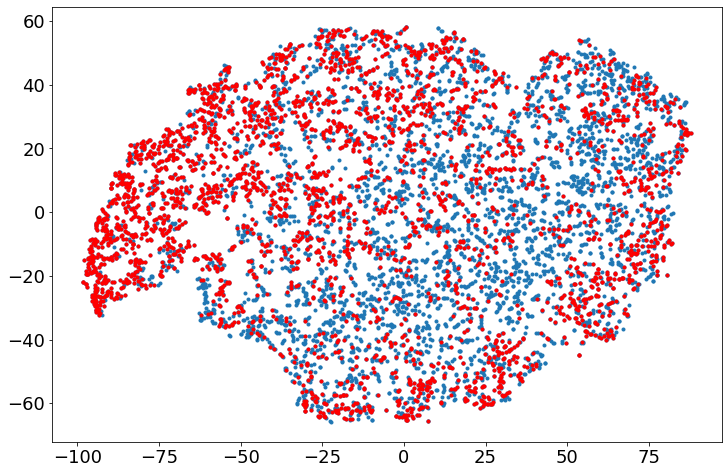

In [ ]:

plt.figure(figsize =(12,8))
plt.plot(X_emb[:,0],X_emb[:,1], '.')#, markersize = 2)

plt.plot(mas_X_emb[:,0], mas_X_emb[:,1], '.', c = 'red')#, markersize = 2)


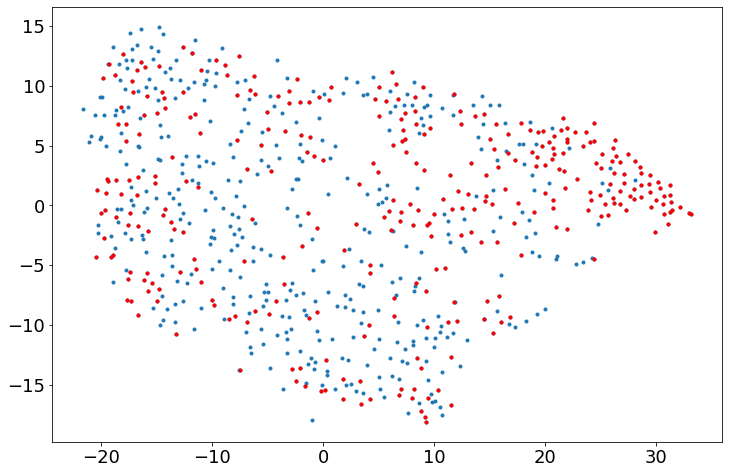

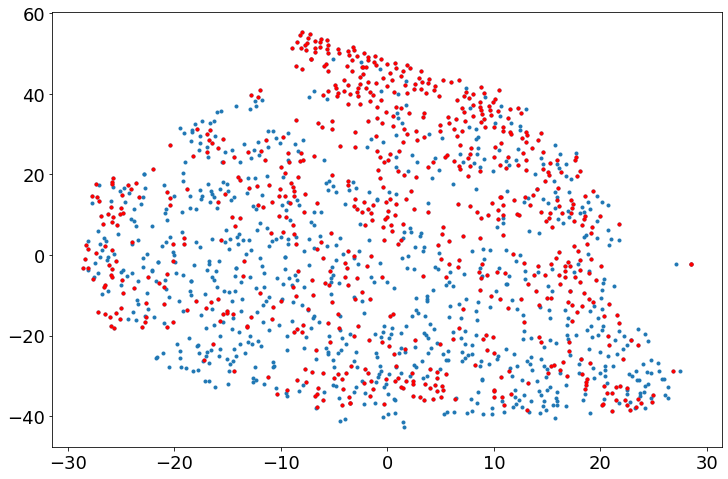

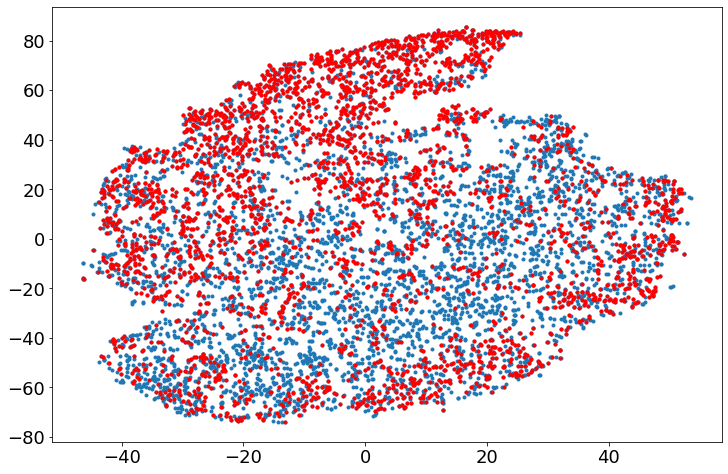

In [ ]:
ss = [100,50,10]

np.random.seed(69)



for s in ss:
  X_emb = manifold.TSNE(n_components=2,  perplexity=50.0, random_state = 69
                        ).fit_transform(two_jets_nolabel.iloc[::s])
  

  mask = two_jets['Label'].iloc[::s] == 's'

  mas_X_emb = X_emb[mask]

  plt.figure(figsize =(12,8))
  plt.plot(X_emb[:,0],X_emb[:,1], '.')
  plt.plot(mas_X_emb[:,0], mas_X_emb[:,1], '.', c = 'red')
  plt.show()

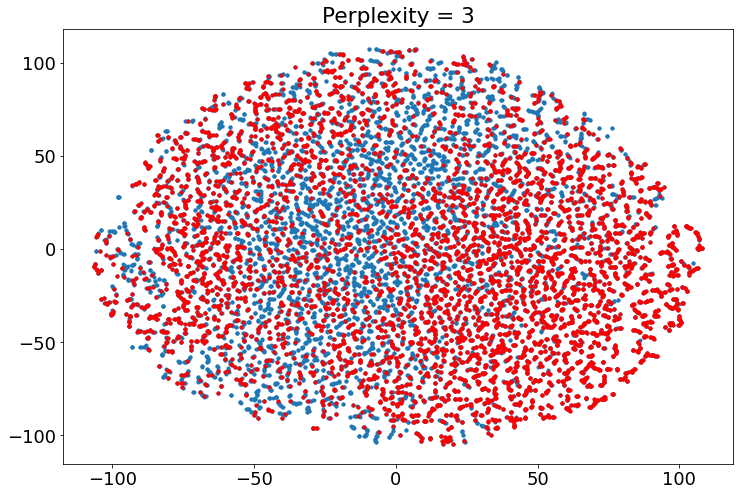

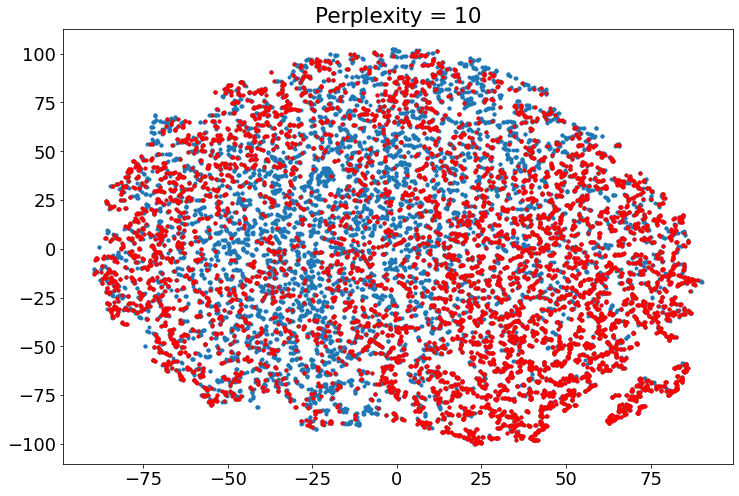

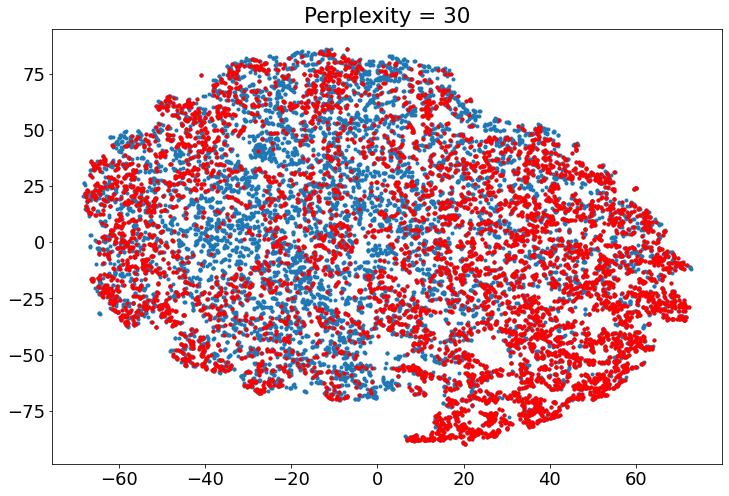

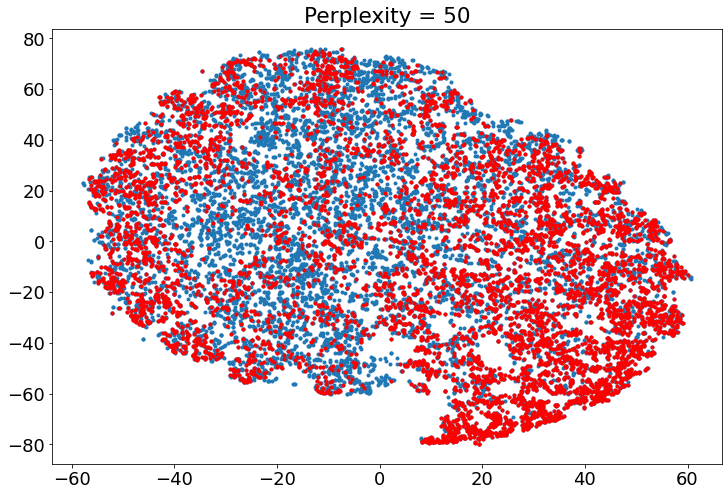

In [ ]:
pp = [3, 10, 30, 50]

np.random.seed(69)



for p in pp:
  X_emb = manifold.TSNE(n_components=2,  perplexity=p, random_state = 69
                        ).fit_transform(two_jets_nolabel.iloc[::5])
  

  mask = two_jets['Label'].iloc[::5] == 's'

  mas_X_emb = X_emb[mask]
  
  plt.figure(figsize =(12,8))
  plt.plot(X_emb[:,0],X_emb[:,1], '.')
  plt.plot(mas_X_emb[:,0], mas_X_emb[:,1], '.', c = 'red')
  plt.title("Perplexity = %.0f"%(p))
  plt.show()

In [ ]:
manifold.TSNE?

In [ ]:
#pd.plotting.scatter_matrix(higgsdata)

In [ ]:
labels = np.array(two_jets.Label)
weights = np.array(two_jets.Weight)

In [ ]:
labels

array(['s', 's', 's', ..., 's', 's', 'b'], dtype=object)

In [ ]:
weights

array([0.00265331, 0.00265331, 0.0015027 , ..., 0.01863612, 0.01863612,
       0.06406078])

In [ ]:
# leave
from sklearn.model_selection import train_test_split

Normaliz
ziamo

In [ ]:
traindata, testdata, train_label, test_label = train_test_split(two_jets[two_jets.columns[:-2]],
                                                                labels,
                                                                train_size = 0.75,
                                                                test_size = 0.25,
                                                                random_state = 69)

In [ ]:
two_jets.columns

Index(['index', 'EventId', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
RandomForestClassifier?

In [ ]:
two_jets.shape

(72543, 33)

In [ ]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

from pprint import pprint

# Look at parameters used by our current forest
rf = RandomForestClassifier(n_estimators = 1000,
                            max_depth = 4,
                            random_state = 69)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 69,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf.fit(traindata, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=69, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(traindata, train_label)
#accuracy of classifier

0.7387284724392081

In [ ]:
rf.score(testdata, test_label)

0.7394133215703573

In [ ]:
rf.predict(testdata)
#rf.predict(testdata) == test_label 

array(['s', 's', 's', ..., 'b', 'b', 'b'], dtype=object)

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=1000, random_state = 69)


In [ ]:
gbt.fit(traindata, train_label)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbt.score(traindata, train_label), gbt.score(testdata, test_label)

(0.8803278989835867, 0.8461623290692545)

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred,
                          normalize = True,
                          title = '',
                          cmap = pl.cm.bone)